# Classification algorithms with sklearn

In [ ]:
#### GOOGLE COLAB #####
! mkdir img
! wget https://github.com/davidggphy/2019_03_Curso_IFT/raw/master/notebooks/01_classification/img/precisionrecall.png
! mv precisionrecall.png img/precisionrecall.png

In [2]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from plot_confusion_matrix import plot_confusion_matrix,plot_confusion_matrix2
from decision_trees_utils import print_cart

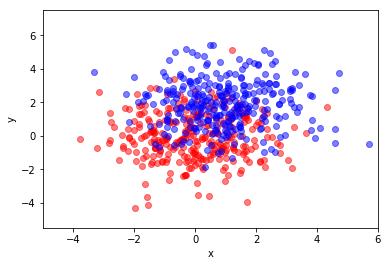

In [3]:
npoints0 = 300 # RED, LABEL 0
npoints1 = 300 # BLUE, LABEL 1

mu_vec0 = np.array([0,0])
cov_mat0 = np.array([[2,0],[0,2]])
x0_samples = np.random.multivariate_normal(mu_vec0, cov_mat0, npoints0)
mu_vec0 = mu_vec0.reshape(1,2).T # to 1-col vector

mu_vec1 = np.array([1,2])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, npoints1)
mu_vec1 = mu_vec1.reshape(1,2).T

xrange = (-5,6)
yrange = (-5.5,7.5)
plt.xlim(xrange)
plt.ylim(yrange)
plt.xlabel('x')
plt.ylabel('y',)
plt.scatter(x0_samples[:,0],x0_samples[:,1],c='red',alpha=0.5)
plt.scatter(x1_samples[:,0],x1_samples[:,1],c='blue',alpha=0.5)
plt.show()

In [4]:
Y = np.hstack((np.ones(len(x1_samples)),np.zeros(len(x0_samples))))
X = np.vstack( (x0_samples,x1_samples)  )
X_train,X_val,Y_train, Y_val = train_test_split(X,Y,test_size = 0.3)
X_val,X_test,Y_val, Y_test = train_test_split(X_val,Y_val,test_size = 0.5)

## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train, Y_train)

In [6]:
probs_test = clf.predict_proba(X_val)[:,1]
Y_pred = clf.predict(X_val)

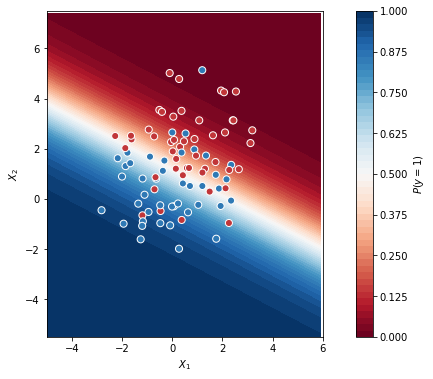

In [7]:
xx, yy = np.mgrid[xrange[0]:xrange[1]:.1, yrange[0]:yrange[1]:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(12, 6))
contour = ax.contourf(xx, yy, probs, 50, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks(np.linspace(0,1,9))

ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=xrange, ylim=yrange,
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

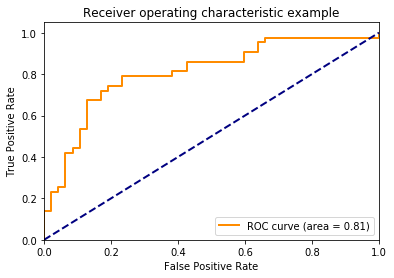

In [8]:
fpr, tpr, _ = metrics.roc_curve(Y_val,probs_test,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

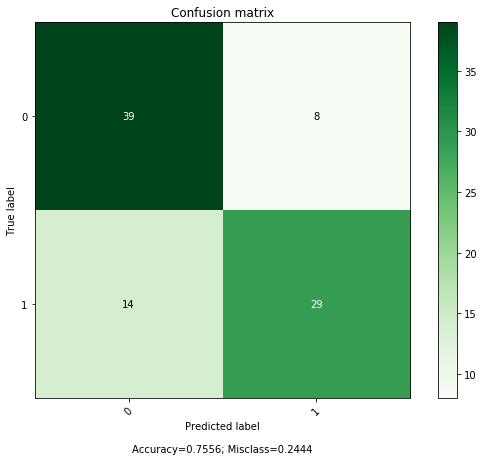

In [9]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_pred)
plot_confusion_matrix2(confusion_matrix,target_names=['0','1'],normalize=False, cmap=plt.cm.Greens)

## Decission Tree

In [10]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split=10).fit(X_train, Y_train)

In [11]:
probs_test = clf.predict_proba(X_val)[:,1]
Y_pred = clf.predict(X_val)

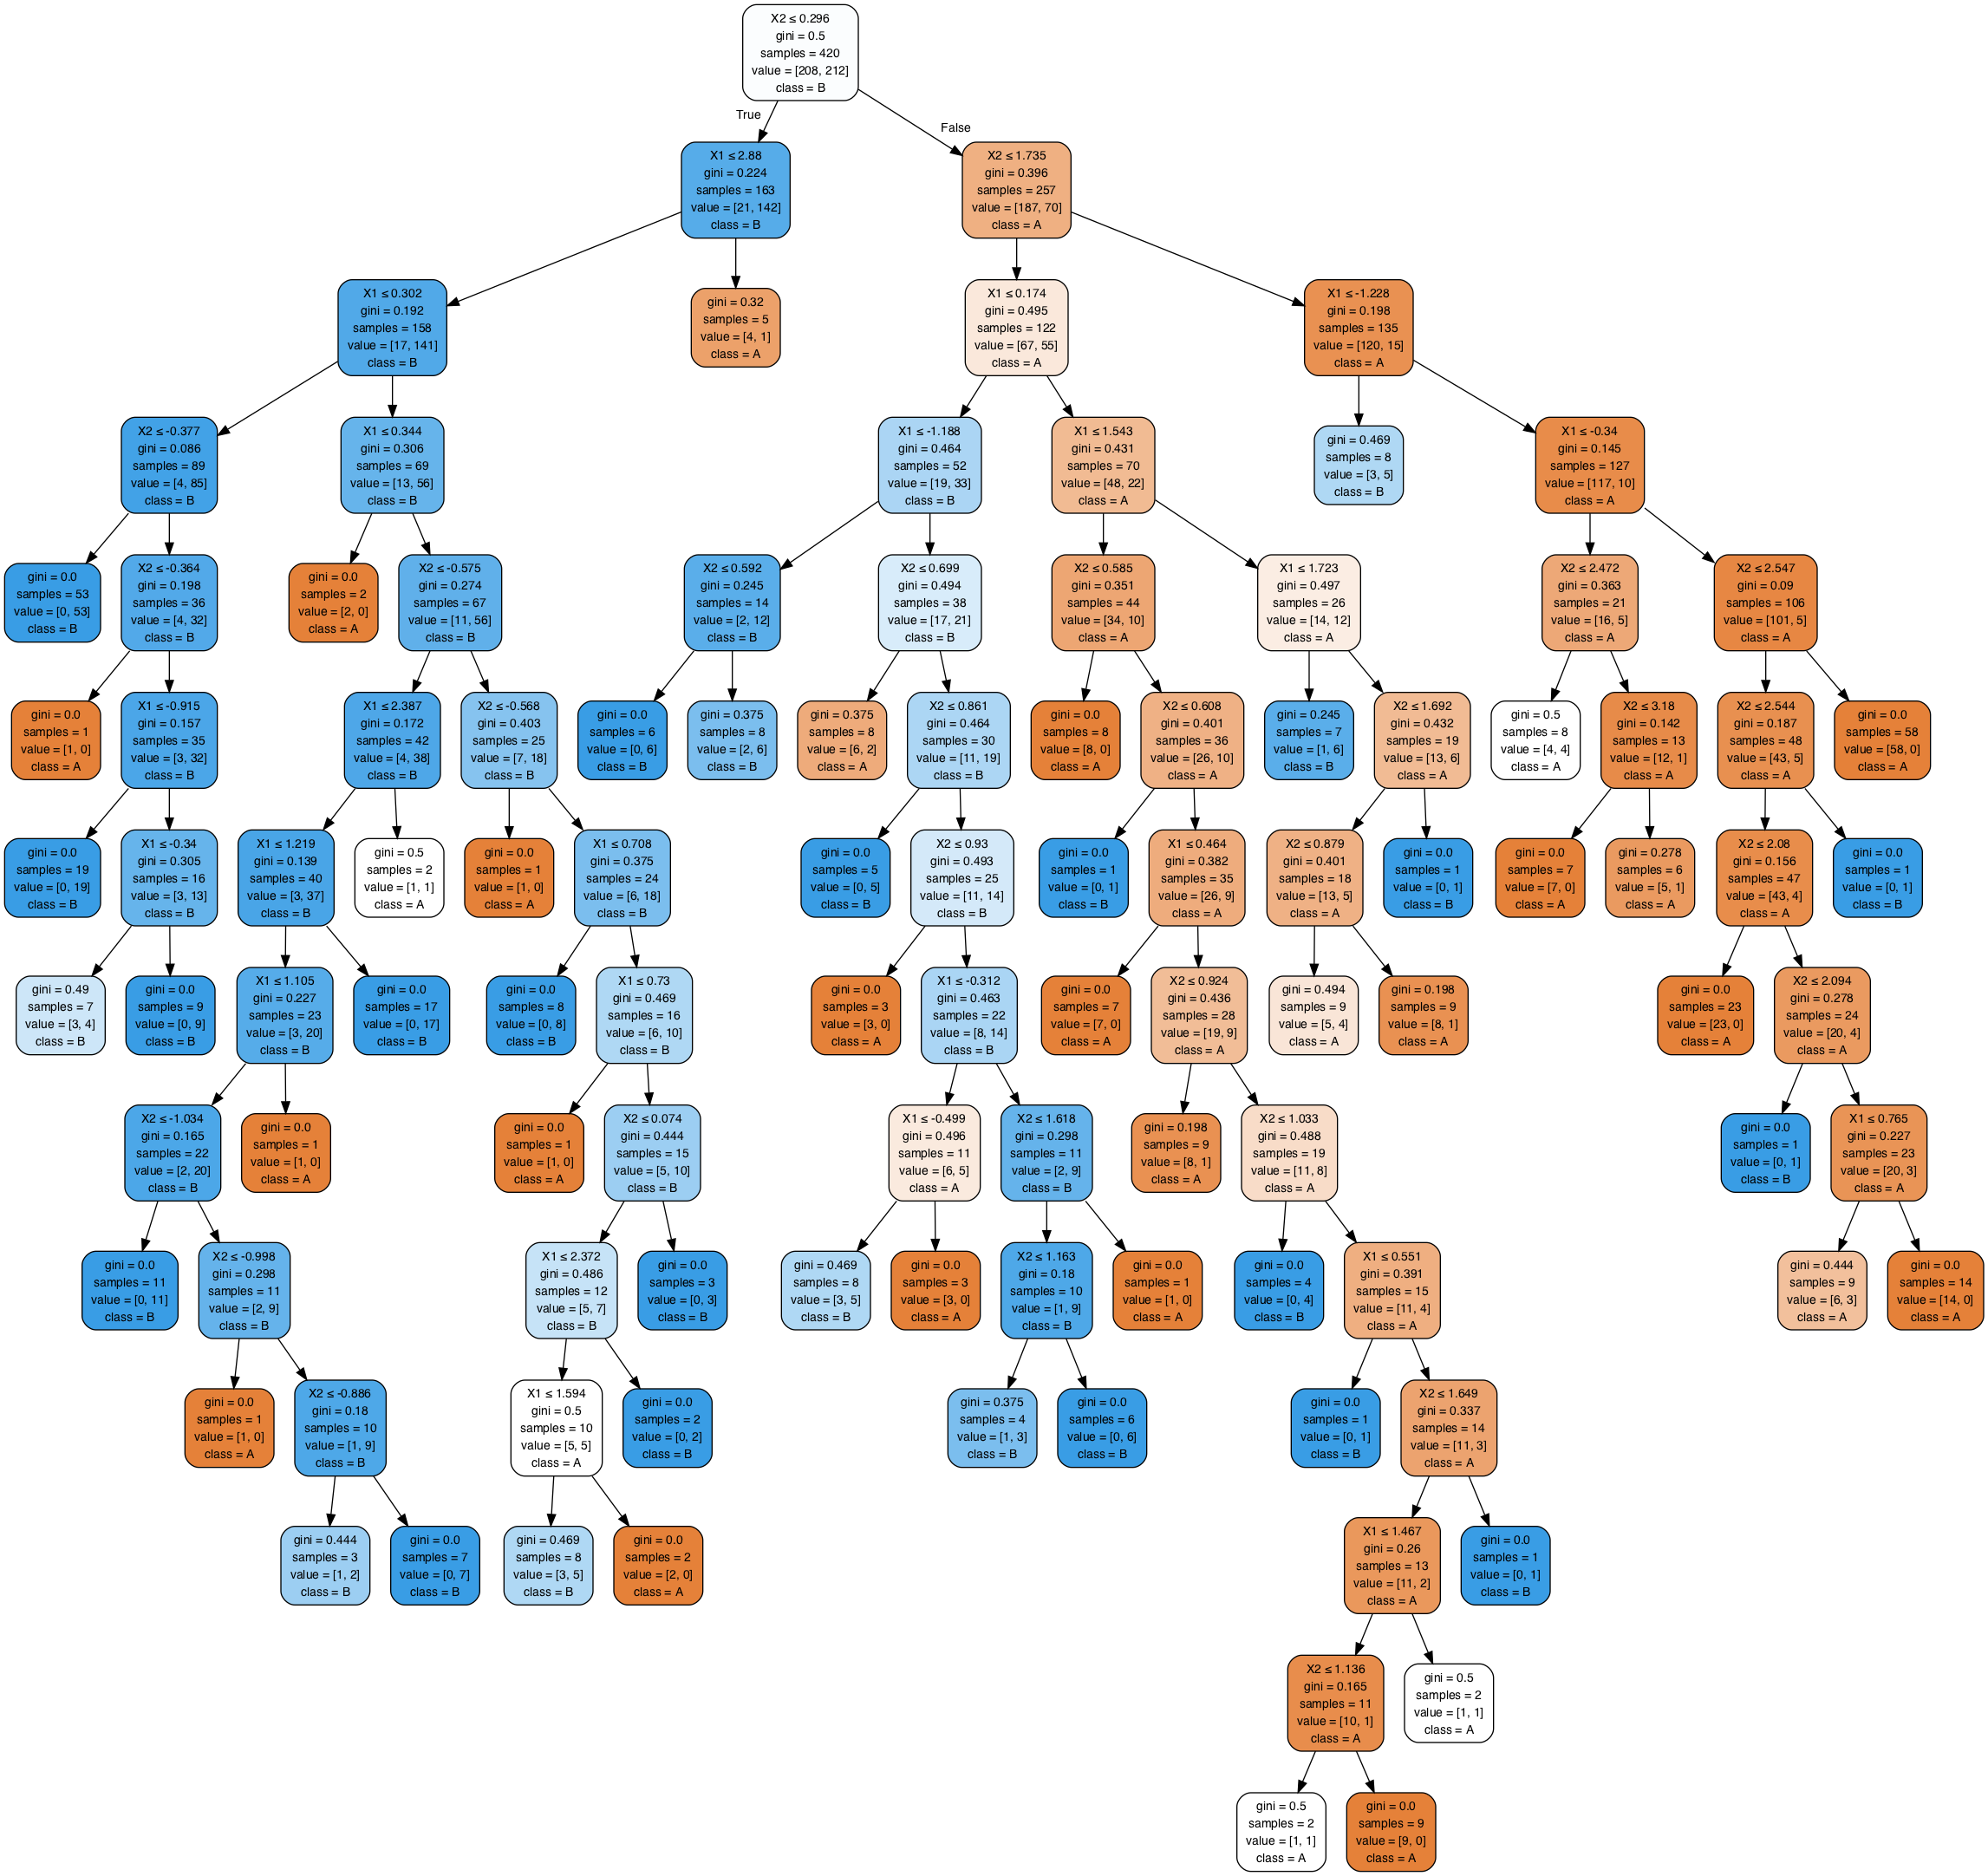

In [12]:
print_cart(clf,['X1','X2'])

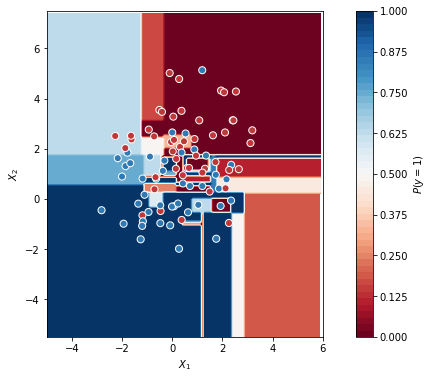

In [13]:
xx, yy = np.mgrid[xrange[0]:xrange[1]:.1, yrange[0]:yrange[1]:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(12, 6))
contour = ax.contourf(xx, yy, probs, 50, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks(np.linspace(0,1,9))

ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=xrange, ylim=yrange,
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

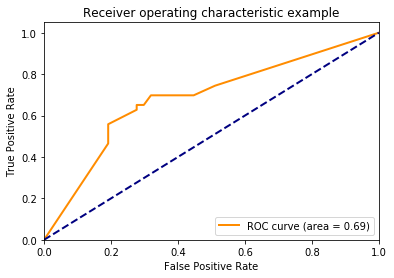

In [14]:
fpr, tpr, _ = metrics.roc_curve(Y_val,probs_test,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

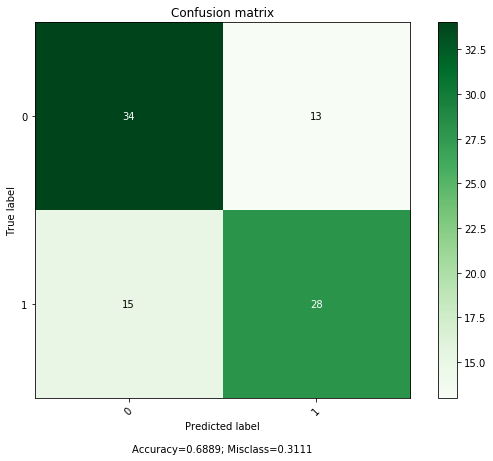

In [15]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_pred)
plot_confusion_matrix2(confusion_matrix,target_names=['0','1'],normalize=False, cmap=plt.cm.Greens)

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,max_depth=5).fit(X_train, Y_train)
probs_test = clf.predict_proba(X_val)[:,1]
Y_pred = clf.predict(X_val)

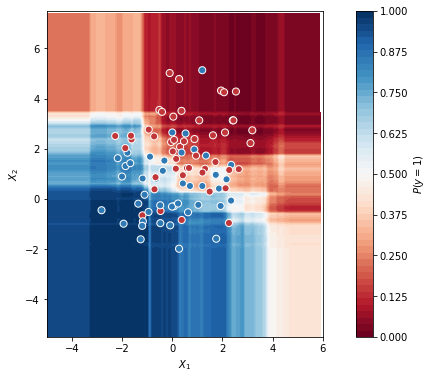

In [17]:
xx, yy = np.mgrid[xrange[0]:xrange[1]:.1, yrange[0]:yrange[1]:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(12, 6))
contour = ax.contourf(xx, yy, probs, 50, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks(np.linspace(0,1,9))

ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=xrange, ylim=yrange,
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

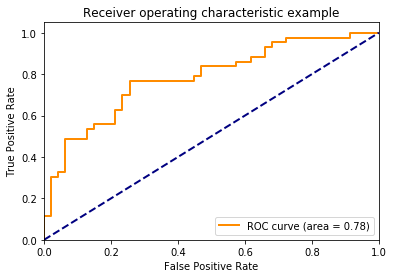

In [18]:
fpr, tpr, _ = metrics.roc_curve(Y_val,probs_test,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

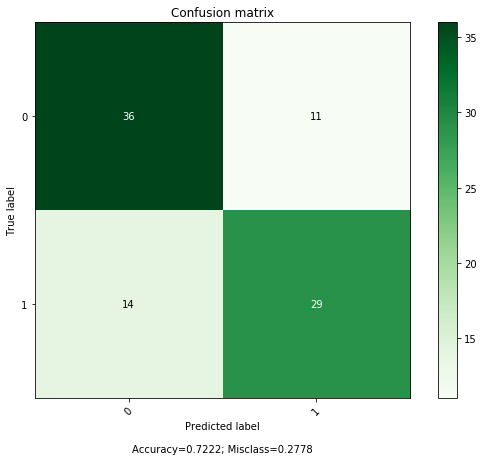

In [19]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_pred)
plot_confusion_matrix2(confusion_matrix,target_names=['0','1'],normalize=False, cmap=plt.cm.Greens)

## K-nearest neighbors KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, weights='distance').fit(X_train, Y_train)
probs_test = clf.predict_proba(X_val)[:,1]
Y_pred = clf.predict(X_val)

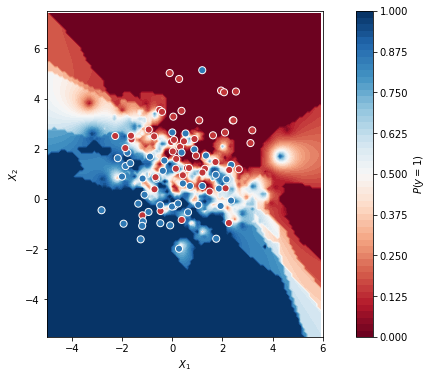

In [21]:
xx, yy = np.mgrid[xrange[0]:xrange[1]:.1, yrange[0]:yrange[1]:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(12, 6))
contour = ax.contourf(xx, yy, probs, 50, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks(np.linspace(0,1,9))

ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=xrange, ylim=yrange,
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

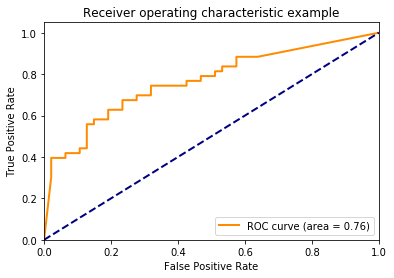

In [22]:
fpr, tpr, _ = metrics.roc_curve(Y_val,probs_test,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

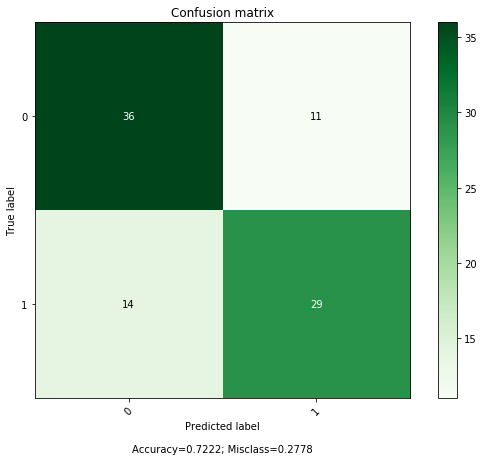

In [23]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_pred)
plot_confusion_matrix2(confusion_matrix,target_names=['0','1'],normalize=False, cmap=plt.cm.Greens)

## Naive Bayes

In [24]:
from sklearn import naive_bayes

clf = naive_bayes.GaussianNB().fit(X_train, Y_train)
probs_test = clf.predict_proba(X_val)[:,1]
Y_pred = clf.predict(X_val)

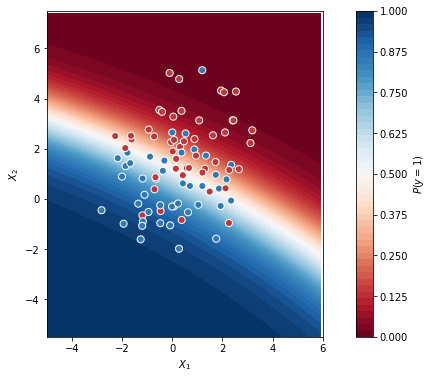

In [25]:
xx, yy = np.mgrid[xrange[0]:xrange[1]:.1, yrange[0]:yrange[1]:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(12, 6))
contour = ax.contourf(xx, yy, probs, 50, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks(np.linspace(0,1,9))

ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=xrange, ylim=yrange,
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

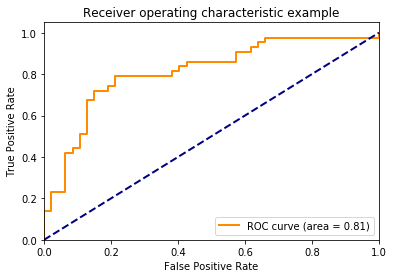

In [26]:
fpr, tpr, _ = metrics.roc_curve(Y_val,probs_test,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

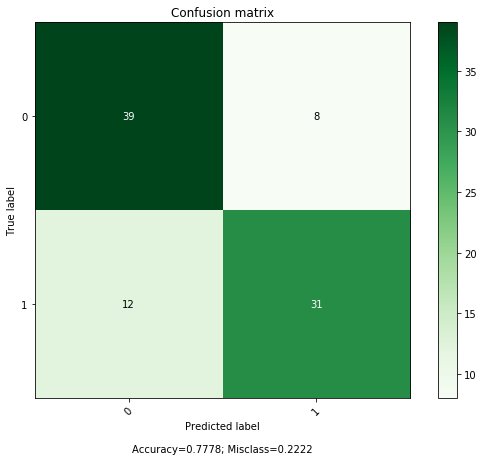

In [27]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_pred)
plot_confusion_matrix2(confusion_matrix,target_names=['0','1'],normalize=False, cmap=plt.cm.Greens)

## EXERCISE

We have not normalize / standarized the data. Check how the metrics change if you do so. Implement a proper preprocessing and reapply the classifiers.

Hint: 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## EXERCISE

Try, at least for one algorithm, to tune the hyperparameters to maximize the area under the ROC curve (AUC score).

## EXERCISE

Try the same examples with an unbalance dataset. For example, set:
`npoints0 = 100`
`npoints1 = 900`

What happens to each classifier. What do you observe in the confusion matrix? Are all the classifiers affected in the same way?

What would you do if it is more important to correctly classify class 0 than 1?

What is the minimal accuracy you would expect?

Why do we have a test set that we haven't used?

![title](img/precisionrecall.png)